### OBS: Para excecutar no Colab, descomentar a célula abaixo

In [ ]:
# !pip install mxnet==1.7.0.post1

# Fundamentação 1: Álgebra Linear

## `ndarray`
Principal estrutura de dados para ML e Redes Neuronais Artificiais

In [1]:
import mxnet as mx
from mxnet import nd

In [2]:
x = nd.arange(12)
print(x)


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
<NDArray 12 @cpu(0)>


In [3]:
x.shape

(12,)

In [4]:
x.size

12

In [5]:
x = x.reshape((3, 4)) #equivalente à x.reshape((-1, 4)) e x.reshape((3, -1))
print(x)
print(x.shape) #é uma tupla que indica a dimensionalidade ao longo de cada um dos eixos.
print(x.size)


[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>
(3, 4)
12


In [6]:
nd.empty((3, 4))


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 3x4 @cpu(0)>

In [7]:
nd.zeros((2, 3, 4))


[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
<NDArray 2x3x4 @cpu(0)>

In [8]:
nd.ones((2, 3, 4))


[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]
<NDArray 2x3x4 @cpu(0)>

In [9]:
y = nd.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]]) #a partir de uma lista Python
y


[[2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]]
<NDArray 3x4 @cpu(0)>

## Criação de arrays seguindo uma distribuição qualquer

Exemplos: Distribuição Normal e Uniforme

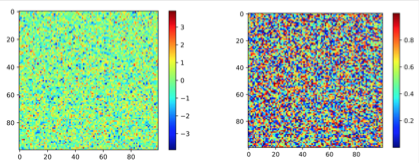

Exemplo de uso: parâmetro de inicialização de uma rede neuronal.

In [10]:
nd.random.normal(3.5, 2.22, shape=(3, 4)) #média = 0 e variância = 1


[[ 6.0820346   4.574046    4.165031    3.8397164 ]
 [ 0.90523124  6.9589176   2.288003   -1.7294979 ]
 [ 4.7019973   9.446285    6.2852883   2.2817218 ]]
<NDArray 3x4 @cpu(0)>

## Vetores = arrays 1D

In [11]:
x = nd.array([1, 2, 4, 8])
y = nd.ones_like(x) * 2
print('x =', x)
print('y =', y)
print('x ** y', x ** y) 
print('x + y', x + y)
print('x - y', x - y)
print('x * y', x * y)
print('x / y', x / y)

x = 
[1. 2. 4. 8.]
<NDArray 4 @cpu(0)>
y = 
[2. 2. 2. 2.]
<NDArray 4 @cpu(0)>
x ** y 
[ 1.  4. 16. 64.]
<NDArray 4 @cpu(0)>
x + y 
[ 3.  4.  6. 10.]
<NDArray 4 @cpu(0)>
x - y 
[-1.  0.  2.  6.]
<NDArray 4 @cpu(0)>
x * y 
[ 2.  4.  8. 16.]
<NDArray 4 @cpu(0)>
x / y 
[0.5 1.  2.  4. ]
<NDArray 4 @cpu(0)>


In [12]:
x.exp() #neperiano


[2.7182817e+00 7.3890562e+00 5.4598148e+01 2.9809580e+03]
<NDArray 4 @cpu(0)>

In [13]:
x = x.reshape(shape=(4,1))
y = y.reshape(shape=(4,1))
print('x =', x)
print('y =', y)
nd.concat(x, y, dim=1) #concatenar: dim 0 (linhas) e dim 1 (colunas)

x = 
[[1.]
 [2.]
 [4.]
 [8.]]
<NDArray 4x1 @cpu(0)>
y = 
[[2.]
 [2.]
 [2.]
 [2.]]
<NDArray 4x1 @cpu(0)>



[[1. 2.]
 [2. 2.]
 [4. 2.]
 [8. 2.]]
<NDArray 4x2 @cpu(0)>

### Somas (vetores)

$\sum_{i=1}^d u_i$ (soma dos elementos em um vetor $\mathbf{u}$ de tamanho $d$)

In [14]:

x.sum()#somatório


[15.]
<NDArray 1 @cpu(0)>

In [15]:
print(x.norm())
print(x.norm().asscalar()) #transforma num escalar


[9.219544]
<NDArray 1 @cpu(0)>
9.219544


**ATENÇÃO: por convenção, na MXNet escalares são NDArrays com apenas um elemento (usar asscalar é ineficiente)**

## Matrizes = arrays 2D
Tipicamente representadas por letras maiúsculas ($A$, $B$, $C$)

### Somas e médias (matrizes)

Para uma matriz $A$ $m \times n$ matrix ==> $\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$.

In [16]:
A = nd.arange(20).reshape((2,10))
print(A)
print(nd.sum(A,0))


[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]]
<NDArray 2x10 @cpu(0)>

[10. 12. 14. 16. 18. 20. 22. 24. 26. 28.]
<NDArray 10 @cpu(0)>


$$\mathrm{mean}(\mathbf{u}) = \frac{1}{d} \sum_{i=1}^{d} u_i \text{ and }
\mathrm{mean}(A) = \frac{1}{n \cdot m} \sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$$

In [17]:
print(nd.mean(A))
print(nd.sum(A) / A.size)


[9.5]
<NDArray 1 @cpu(0)>

[9.5]
<NDArray 1 @cpu(0)>


## Multiplicação entre Matrizes

Considere duas matrizes: $A \in \mathbb{R}^{n \times k}$ and $B \in \mathbb{R}^{k \times m}$:

$$A=\begin{pmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{pmatrix},\quad
B=\begin{pmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{pmatrix}$$

$$AB = \begin{pmatrix}
\cdots & \mathbf{a}^T_{1} &...  \\
\cdots & \mathbf{a}^T_{2} & \cdots \\
 & \vdots &  \\
 \cdots &\mathbf{a}^T_n & \cdots \\
\end{pmatrix}
\begin{pmatrix}
\vdots & \vdots &  & \vdots \\
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
 \vdots & \vdots &  &\vdots\\
\end{pmatrix}
= \begin{pmatrix}
\mathbf{a}^T_{1} \mathbf{b}_1 & \mathbf{a}^T_{1}\mathbf{b}_2& \cdots & \mathbf{a}^T_{1} \mathbf{b}_m \\
 \mathbf{a}^T_{2}\mathbf{b}_1 & \mathbf{a}^T_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^T_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^T_{n} \mathbf{b}_1 & \mathbf{a}^T_{n}\mathbf{b}_2& \cdots& \mathbf{a}^T_{n} \mathbf{b}_m
\end{pmatrix}
$$

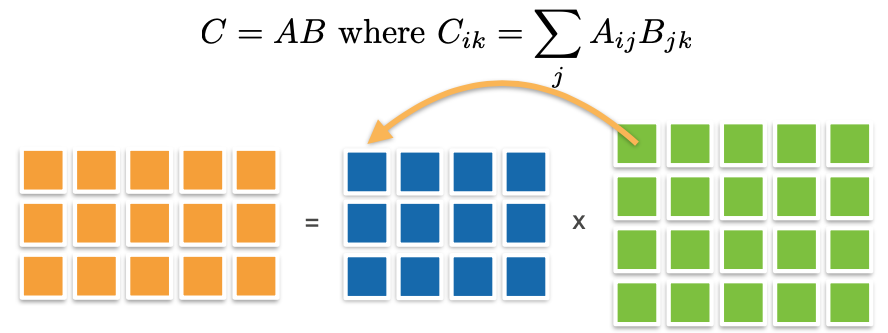

In [18]:
A = nd.arange(12).reshape((3,4))
B = nd.array([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
print('A =', A)
print('B =', B)
print('B.T =', B.T)
C = nd.dot(A, B.T) #operação DOT entre x e transposta de y
print('C =', C)

A = 
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>
B = 
[[2. 1. 4. 3.]
 [1. 2. 3. 4.]
 [4. 3. 2. 1.]]
<NDArray 3x4 @cpu(0)>
B.T = 
[[2. 1. 4.]
 [1. 2. 3.]
 [4. 3. 2.]
 [3. 4. 1.]]
<NDArray 4x3 @cpu(0)>
C = 
[[ 18.  20.  10.]
 [ 58.  60.  50.]
 [ 98. 100.  90.]]
<NDArray 3x3 @cpu(0)>


In [19]:
A == B #operação lógica gera matriz binária


[[0. 1. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 3x4 @cpu(0)>

In [20]:
a = nd.arange(3).reshape((3, 1))
b = nd.arange(2).reshape((1, 2))
a + b #mecanismo de "broadcasting": replica coluna de a e replica linha de b


[[0. 1.]
 [1. 2.]
 [2. 3.]]
<NDArray 3x2 @cpu(0)>

## Indexação

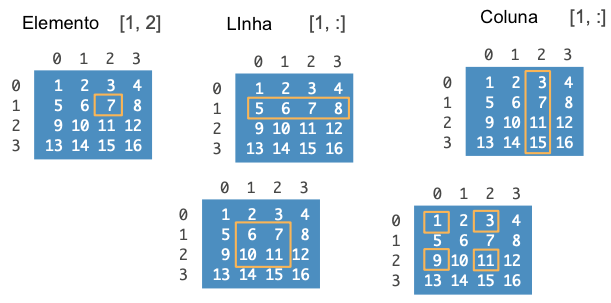

In [21]:
print('A =', A)
A[1:3]

A = 
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>



[[ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 2x4 @cpu(0)>

In [22]:
A[1, 2] = 9
A


[[ 0.  1.  2.  3.]
 [ 4.  5.  9.  7.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

In [23]:
A[0:2, :] = 12
A


[[12. 12. 12. 12.]
 [12. 12. 12. 12.]
 [ 8.  9. 10. 11.]]
<NDArray 3x4 @cpu(0)>

## Tensor

Generalização do número de eixos!

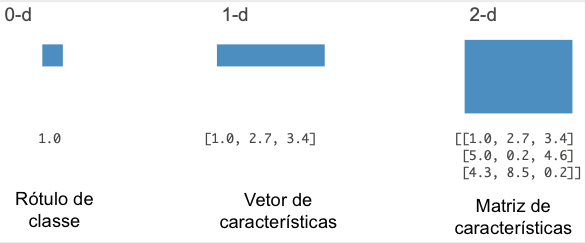
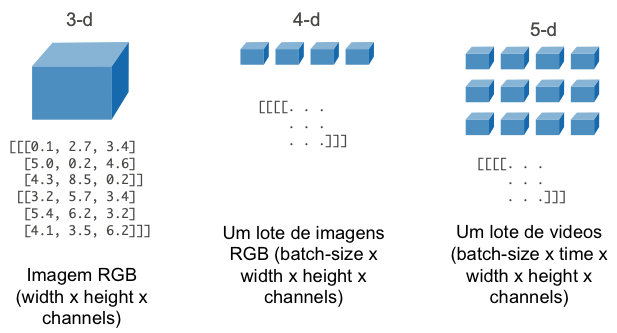

In [24]:
X = nd.arange(24).reshape((2, 3, 4))
print('X.shape =', X.shape)
print('X =', X)

X.shape = (2, 3, 4)
X = 
[[[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]]

 [[12. 13. 14. 15.]
  [16. 17. 18. 19.]
  [20. 21. 22. 23.]]]
<NDArray 2x3x4 @cpu(0)>


### Norma

Devem satisfazer um conjunto de propriedades

1. $\|\alpha A\| = |\alpha| \|A\|$
1. $\|A + B\| \leq \|A\| + \|B\|$
1. $\|A\| \geq 0$
1. If $\forall {i,j}, a_{ij} = 0$, then $\|A\|=0$

Para calcular a norma $\ell_2$ ....

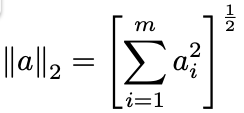

In [25]:
x = nd.arange(4) + 1.0
print(x)
nd.norm(x)


[1. 2. 3. 4.]
<NDArray 4 @cpu(0)>



[5.477226]
<NDArray 1 @cpu(0)>

Para calcular a norma $\ell_1$, calcula-se o valor absoluto de cada valor e os soma.

In [26]:
nd.sum(nd.abs(x))


[10.]
<NDArray 1 @cpu(0)>

# Fundamentação 2: Probabilidade e Estatística

Aprendizagem de Máquina tem tudo a ver com a realização de previsões. 

Chance de um paciente sofrer um ataque cardíaco no próximo ano, dado seu histórico clínico. 

Na Aprendizagem por Reforço, queremos que um agente atue de forma inteligente num ambiente. Isto significa que precisamos de pensar na probabilidade de obter uma recompensa elevada sob cada uma das ações disponíveis. 

Em Sistemas de Recomendação, queremos estimar a probabilidade de um determinado cliente comprar um determinado livro. 

Em todas essas situações, precisamos dos estudos sobre **Probabilidade**.

In [27]:
import mxnet as mx
from mxnet import nd
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [31]:
#Distribuição discreta sobre 6 resultados e gerar uma amostra dos mesmos (ou seja, um dado)
probabilities = nd.ones(6) / 6
nd.random.multinomial(probabilities)


[5]
<NDArray 1 @cpu(0)>

In [32]:
# repetindo várias vezes
print(nd.random.multinomial(probabilities, shape=(10))) # jogando 10 dados
print(nd.random.multinomial(probabilities, shape=(5,10))) # 5 jogadas de 10 dados


[3 5 3 5 2 3 3 2 2 1]
<NDArray 10 @cpu(0)>

[[5 0 5 1 2 2 4 4 3 2]
 [3 2 5 5 0 2 0 3 0 2]
 [4 5 4 0 5 5 5 2 4 4]
 [2 3 4 4 0 4 3 3 0 3]
 [5 4 3 0 2 2 1 1 4 4]]
<NDArray 5x10 @cpu(0)>


In [33]:
# 1000 amostras.
rolls = nd.random.multinomial(probabilities, shape=(1000))
counts = nd.zeros((6,1000))
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals
print("Todas as 1000 jogadas = ",counts)
print("Percentual de cada lado do dado = ",(totals / 1000))

Todas as 1000 jogadas =  
[[  0.   0.   0. ... 167. 167. 167.]
 [  0.   1.   1. ... 167. 167. 167.]
 [  1.   1.   1. ... 176. 177. 177.]
 [  0.   0.   1. ... 159. 159. 159.]
 [  0.   0.   0. ... 156. 156. 156.]
 [  0.   0.   0. ... 173. 173. 174.]]
<NDArray 6x1000 @cpu(0)>
Percentual de cada lado do dado =  
[0.167 0.167 0.177 0.159 0.156 0.174]
<NDArray 6 @cpu(0)>


In [34]:
# Normalizando/estimando pelo número de jogadas
x = nd.arange(1000).reshape((1,1000)) + 1
estimates = counts / x
print(estimates[:,0])
print(estimates[:,1])
print(estimates[:,999]) # Perceba que quanto maior este valor (<1000), mais próximo da realidade


[0. 0. 1. 0. 0. 0.]
<NDArray 6 @cpu(0)>

[0.  0.5 0.5 0.  0.  0. ]
<NDArray 6 @cpu(0)>

[0.167 0.167 0.177 0.159 0.156 0.174]
<NDArray 6 @cpu(0)>


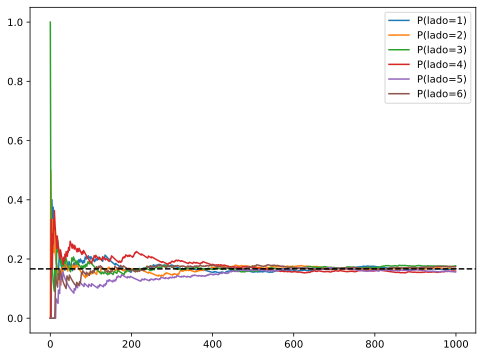

In [35]:
# Plotagem do comportamento com o aumento de amostras
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.plot(estimates[i, :].asnumpy(), label=("P(lado=" + str(i+1) +")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()   
plt.show()

### Visualizando mais claramente a distribuição Uniforme...

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import mxnet as mx
from mxnet import nd
import numpy as np
import math

In [37]:
import random
for i in range(10):
    print(random.random())

0.38228665960061714
0.12281084613302595
0.7033149856745958
0.45117879188502386
0.17757338926251642
0.6903341155862636
0.2564416264919379
0.3750376187246417
0.6442438491613858
0.09655045889773217


In [38]:
for i in range(10):
    print(random.randint(1, 100))

100
5
39
51
40
100
77
16
92
23


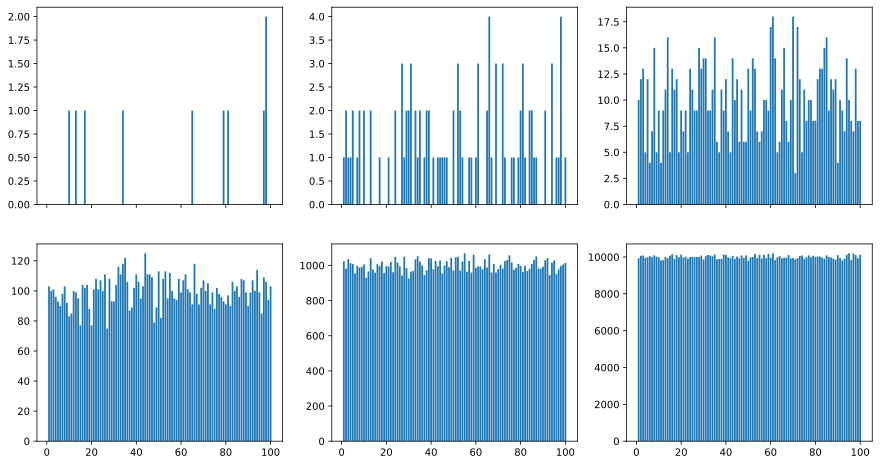

In [39]:
counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
axes = axes.reshape(6)

for i in range(1, 1000001):
    counts[random.randint(0, 99)] += 1
    if i in [10, 100, 1000, 10000, 100000, 1000000]:
        axes[int(math.log10(i))-1].bar(np.arange(1, 101), counts)
plt.show()

### A Distribuição Normal (ou Gaussiana)

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

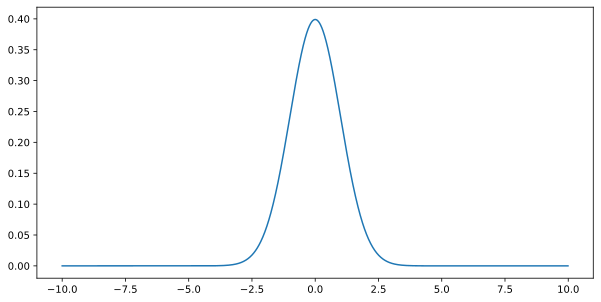

In [40]:
x = np.arange(-10, 10, 0.01) #intervalo
sig = 1 #desvio
p = (1/math.sqrt(2 * math.pi * sig**2)) * np.exp(-(1/2*sig**2) * x**2)
plt.figure(figsize=(10, 5))
plt.plot(x, p)
plt.show()

## Variáveis aleatórias, Probabilidade Conjunta e Independência

Voltando ao exemplo dos lançamentos dos dados, cada dado é uma variável aleatória cujo valor pertence ao espaço amostral $S=\{1,2,3,4,5,6\}$

No caso de dois dados $X$ e $Y$, temos que $P(X, Y) = P(X) · P(Y)$ 

## Mas nem tudo são dados ou moedas....

---


---

Para imagem 1:

$P( Y = "gato")\approx 0,5$

$P( Y = "cachorro") \approx 0,5$

Para imagem 2:

$P( Y = "gato")\approx 0,5$

$P( Y = "cachorro") \approx 0,5$


**E agora?**

---
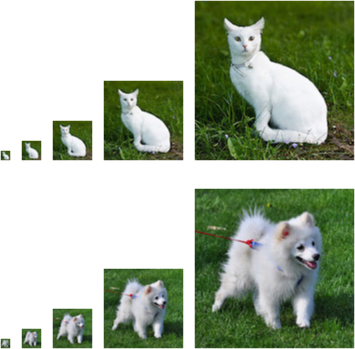

---



Para imagem 1:

$P( Y = "gato")\approx 1,0$

$P( Y = "cachorro") \approx 0,0$

Para imagem 2:

$P( Y = "gato")\approx 0,0$

$P( Y = "cachorro") \approx 1,0$


**O que mudou?**

**Resolução** ( 10×10 ,  20×20 ,  40×40 ,  80×80 , e  160×160  pixels) => **diminui a INCERTEZA**.

## Probabilidade condicional

$P(Y) => P(Y|X)$ 

Para imagem 1:

$P( Y = "gato" | X = 40x40) \approx 0,8$

$P( Y = "cachorro" | X = 40x40) \approx 0,2$


## Teorema de Bayes

Uma das equações mais úteis da Estatística!

Regra da multiplicação: 

$P(B, A) = P(B \mid A) P(A)$. 

$P(A, B) = P(A \mid B) P(B)$. 

Como $P(B, A) = P(A, B)$, então:

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

## Exemplo teste COVID

Suponha teste de Covid em um paciente.

Nunca erra se o paciente está com Covid. 
Erra em 1% se o paciente está sadio.

$D_1$ = resultado do exame ($1$ ou $0$)

$H$ = estado real do paciente ($1$ ou $0$)

| Probabilidade condicional | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_1 = 1 \mid H)$| 1 |  0.01 |
|$P(D_1 = 0 \mid H)$| 0 |  0.99 |

Qual a probabilidade de um paciente estar com Covid se o exame der positivo, sabendo-se que $0,15\%$ da população tem a doença?

$P(H = 1 \mid D_1 = 1)$ = ?

$P(H=1) = 0.0015$


$$\begin{aligned}
&P(D_1 = 1) \\
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}
$$

(**OBS:** uso de **MARGINALIZAÇÃO** na segunda linha)

Então,

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1)\\ =& \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} \\ =& 0.1306 \end{aligned}.$$

Ou seja, existe apenas 13.06% de chance do paciente ter realmente a doença. 

# Fundamentação 3: Cálculo diferencial

Na aprendizagem profunda, nós *treinamos* modelos, atualizando-os sucessivamente
para que eles fiquem cada vez melhores à medida que vêem mais e mais dados.

Normalmente, "ficar melhor" significa minimizar uma função de *perda*,
uma pontuação que responde à pergunta "o quão ruim é nosso modelo"?

Em última análise, o que realmente nos interessa é produzir um modelo que funciona bem com os dados
que nunca tínhamos visto antes. Mas só podemos ajustar o modelo aos dados que realmente podemos ver.

Assim, podemos decompor a tarefa de ajuste dos modelos em duas questões fundamentais:

**i) *Otimização*:** o processo de adequação de nossos modelos aos dados observados;  
**ii) *Generalização*:** os princípios matemáticos e sacadas
que orientam sobre como produzir modelos cuja validade se estende
para além do conjunto exato de exemplos de dados usados para treiná-los.

O Cálculo Diferencial nos ajuda com a primeira questão. O **cálculo de derivadas** é
um passo crucial em quase todos os algoritmos de otimização de aprendizagem profunda. Normalmente, escolhemos funções de perda que são diferenciáveis em relação aos parâmetros de nosso modelo.

Em termos simples, isto significa que para cada parâmetro, podemos determinar com que rapidez a perda aumentaria ou diminuiria, quando *aumentamos* ou *diminuimos* esse parâmetro por uma quantidade infinitesimamente pequena.

$f: \mathbb{R} \rightarrow \mathbb{R}$,

$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h},$

A derivada $f'(x)$ é interpretada como a taxa de modificação instantânea de $f(x)$
em relação à $x$. Essa taxa é baseada na variação de $h$ em $x$, que se aproxima de $0$.

Representações equivalentes: 

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

Geometricamente, a derivada no ponto $x=a$ de $y = f(x)$ representa a **inclinação da reta tangente** ao gráfico desta função no ponto $(a,f(a))$.

<!-- https://pt.wikipedia.org/wiki/Derivada#/media/Ficheiro:Graph_of_sliding_derivative_line.gif -->

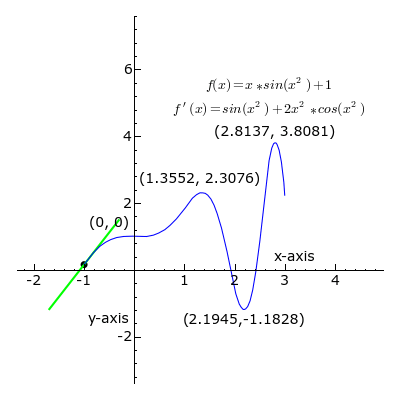 

### Idéia intuitiva da derivada

<!--https://pt.wikipedia.org/wiki/Derivada#/media/Ficheiro:What_is_derivative_(animation).gif -->

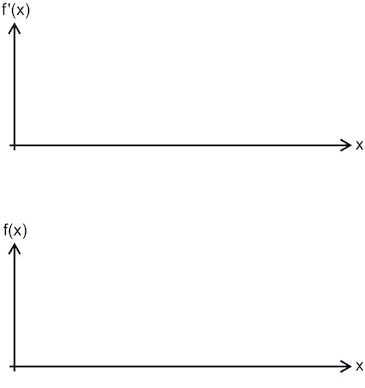

### Gradiente: generalização para vetores

Podemos concatenar **derivadas parciais** de uma **função multivariada** com respeito a todas as suas variáveis para obter o vetor *gradiente* da função.

Suponha que a entrada de uma função $f: \mathbb{R}^n \rightarrow \mathbb{R}$ é um vetor $n$-dimensional $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ e a saída é um escalar. O gradiente da função $f(\mathbf{x})$ em relação à $\mathbf{x}$ é um vetor de $n$ derivadas parciais:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

onde $\nabla_{\mathbf{x}} f(\mathbf{x})$ é usualmente substituído por $\nabla f(\mathbf{x})$ quando não há ambiguidade.


Exemplo de gradiente para função $f(\mathbf{x}) = f(x_1,x_2) = −(cos^2x_1 + cos^2x_2)^2$



Para uma função mais simples...
$f(\mathbf{x}) = f(x_1,x_2) = x_1^2 + 2x_2^2$

$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}\bigg]^\top = [2x_1,4x_2]$

## Diferenciação automática com `autograd`

Modelos complexos de aprendizado profundo utilizam uma ferramenta computacional para agilizar as computações complicadas relacionadas.

1- Constrói **Grafo Computacional**

2- Passo **Forward**: avalia o grafo e armazena resultados intermediários

3- Passo **Backward**: avalia o grafo na ordem inversa (derivadas parciais), eliminando caminhos desnecessários

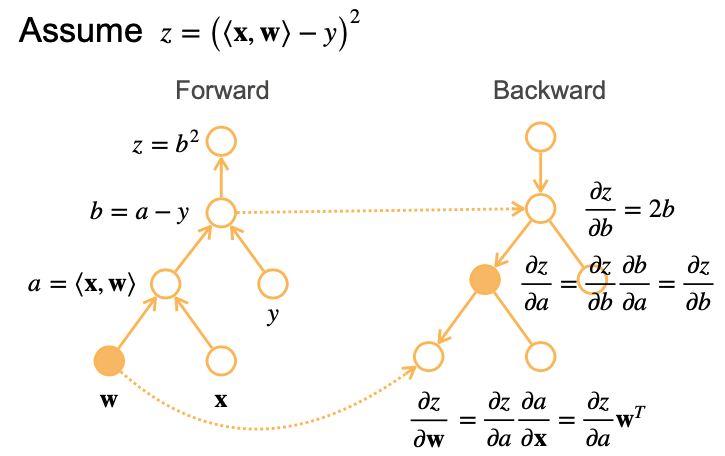


In [41]:
from mxnet import autograd, nd

x = nd.arange(4).reshape((4, 1))
print(x)


[[0.]
 [1.]
 [2.]
 [3.]]
<NDArray 4x1 @cpu(0)>


## Anexar gradiente ao `x`

Aloca memória para armazenar o gradiente, que tem a mesma forma do `x`. 

Também informa ao sistema que precisamos computar seu gradiente.

In [42]:
x.attach_grad()
x.grad


[[0.]
 [0.]
 [0.]
 [0.]]
<NDArray 4x1 @cpu(0)>

### Forward: calcular `y`

$$y = 2\mathbf{x}^{\top}\mathbf{x}$$

MXNet vai criar o grafo correspondente. 

In [43]:
with autograd.record():
    y = 2 * nd.dot(x.T, x)
y


[[28.]]
<NDArray 1x1 @cpu(0)>

### Backward:  calcular gradiente de `y` em relação a cada componente de `x `

In [44]:
y.backward()
print(x.grad)


[[ 0.]
 [ 4.]
 [ 8.]
 [12.]]
<NDArray 4x1 @cpu(0)>


### Conferindo...

Dado $y = 2\mathbf{x}^{\top}\mathbf{x}$, sabemos 

$$\frac{\partial y}{\partial \mathbf x} = 4\mathbf{x}$$

In [45]:
print((x.grad - 4 * x).norm().asscalar() == 0)

True


# Referências para estudo

## Capítulos 1 e 2 de [Dive into Deep Learning](https://d2l.ai/index.html)